In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
cwd = os.getcwd()
print cwd
import scripts.calcon as m

C:\Users\yaakov.tayeb\Documents\GitHub\machine.learning\machine.learning\Tools


In [192]:
#file columns are formated as:  site, device, year, month, SW value, GA value
data = pd.read_clipboard(sep='\t') #read from clipboard
set(data["Month"])
data["Month"]=map(m.Month2Num, data["Month"])

In [193]:
data["SW value"]=data["SW value"].str.replace(",","").astype('float')
data["GA value"]=data["GA value"].str.replace(",","").astype('float')
data["SW-WW"]=data["SW-WW"].str.replace(",","").astype('float')

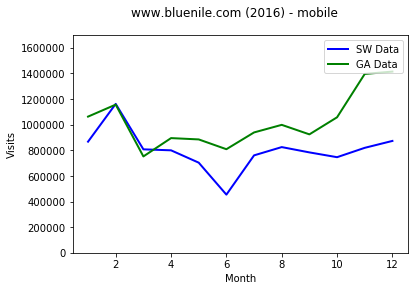

device:	 mobile
delta:	 -0.218748463237
site:	 www.bluenile.com
corr:	 0.477999231951
year:	 2016


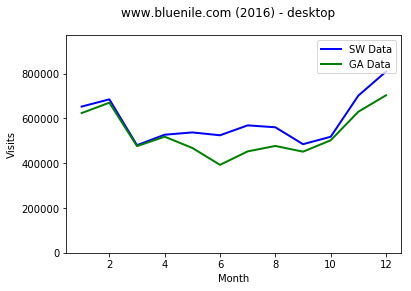

device:	 desktop
delta:	 0.107574354737
site:	 www.bluenile.com
corr:	 0.899711733547
year:	 2016
[{'device': 'mobile', 'year': 2016, 'site': 'www.bluenile.com', 'corr': 0.47799923195105365, 'delta': -0.21874846323671415}, {'device': 'desktop', 'year': 2016, 'site': 'www.bluenile.com', 'corr': 0.89971173354680622, 'delta': 0.10757435473728598}]


In [200]:
saveit=False
summary=list()
local_summary={}    
for sites in set(data["site"]):
    local_summary["site"]=sites
    for y in set(data["Year"]):
        local_summary["year"]=y
        for devices in set(data["device"]):
            tmp_data=data.loc[(data['site'] == sites) & (data['device'] == devices) & (data['Year'] == y)]
            x=list(set(tmp_data.Month))
            y_sw=tmp_data["SW value"]
            y_ga=tmp_data["GA value"]
            local_summary["device"]=devices
            #plot
            plt.figure(1, figsize = (8,4))
            plt.plot(x, y_sw, 'b-', label='SW Data', linewidth=2.0)
            plt.plot(x, y_ga, 'g-', label="GA Data", linewidth=2.0)
            plt.xlabel('Month')
            plt.ylabel('Visits')
            plt.legend(loc='upper right')
            plt.suptitle("%s (%d) - %s" % (sites, y, devices))
            ymax=int(np.max(np.concatenate((y_ga,y_sw))))
            plt.ylim([0,1.2*ymax])
            if saveit==True:
                plt.savefig("output\\%s (%d) - %s.png" % (sites, y, devices)) #save the plot to fil
            else:
                plt.show() #display the plot
            plt.clf()
            local_summary["delta"]=(sum(y_sw)-sum(y_ga))/float(sum(y_ga))
            local_summary["corr"]=np.corrcoef(y_sw,y_ga)[0,1]
            summary.append(dict(local_summary))
            #print details for each site, year, device
            for k,v in local_summary.iteritems():
                print "%s:\t %s" % (k, v)
            #raw_input("Press Enter to continue...") #stop for manual processing
print(summary)

In [196]:
data["Year"]=2016

In [18]:
output=pd.DataFrame(summary)
output.to_csv('C:\\Users\\yaakov.tayeb\\Desktop\\\dis_data.csv', header=True, mode='a')